## This notebook will define/import important tables etc, define nwb file, define the "sort" interval and sort group, and get the recording traces. 

In [74]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [75]:
import os
import numpy as np
import datajoint as dj
import scipy.stats as stats
# dj.config['database.host'] = '127.0.0.1'
# dj.config['database.user'] = 'root'
# dj.config['database.password']= 'simple'
import nwb_datajoint as nd
import math
import matplotlib as plt
import matplotlib.pyplot as plt


# ignore datajoint+jupyter async warnings
import warnings
warnings.simplefilter('ignore', category=DeprecationWarning)
warnings.simplefilter('ignore', category=ResourceWarning)
os.environ['NWB_DATAJOINT_TEMP_DIR']="/stelmo/nwb/tmp"
os.environ['KACHERY_STORAGE_DIR']="/stelmo/nwb/kachery-storage"

In [76]:
from nwb_datajoint.common import (RawPosition, HeadDir, Speed, LinPos, StateScriptFile, VideoFile,
                                  DataAcquisitionDevice, CameraDevice, Probe,
                                  DIOEvents,
                                  ElectrodeGroup, Electrode, Raw, SampleCount,
                                  LFPSelection, LFP, LFPBandSelection, LFPBand,
                                  SortGroup, SpikeSortingFilterParameters, SpikeSortingArtifactDetectionParameters,
                                  SpikeSortingRecordingSelection, SpikeSortingRecording, 
                                  SpikeSortingWorkspace, 
                                  SpikeSorter, SpikeSorterParameters, SortingID,
                                  SpikeSortingSelection, SpikeSorting, 
                                  SpikeSortingMetricParameters,
                                  ModifySortingParameters, ModifySortingSelection, ModifySorting, 
                                  AutomaticCurationParameters, AutomaticCurationSelection,
                                  AutomaticCuration,
                                  CuratedSpikeSortingSelection, CuratedSpikeSorting,
                                  UnitInclusionParameters,
                                  FirFilter,
                                  IntervalList, SortInterval,
                                  Lab, LabMember, LabTeam, Institution,
                                  BrainRegion,
                                  SensorData,
                                  Session, ExperimenterList,
                                  Subject,
                                  Task, TaskEpoch,
                                  Nwbfile, AnalysisNwbfile, NwbfileKachery, AnalysisNwbfileKachery,get_valid_intervals)

# Define your nwb file name

In [77]:
nwb_file_name = 'senor20201117_.nwb'

### and look at its properties- sessions, electrodes, set sort group if its first time working with rec. 
### Use this to decide which group of electrodes you would like to visualize 

In [94]:
# np.unique((Electrode & {'nwb_file_name': nwb_file_name}))#.fetch('probe_type'))
Electrode() & {'nwb_file_name': nwb_file_name} #&{'probe_type': 'tetrode_12.5'}).fetch('electrode_id'))
# get unique probe id
# np.unique((Electrode & {'nwb_file_name': nwb_file_name}).fetch('electrode_group_name'))
# np.unique((Electrode & {'nwb_file_name': nwb_file_name}).fetch('electrode_id'))
# np.unique((Electrode & {'nwb_file_name': nwb_file_name} &  {'probe_type': '128c-4s6mm6cm-15um-26um-sl'}).fetch('electrode_id'))
# np.unique((Electrode & {'nwb_file_name': nwb_file_name}).fetch('probe_type'))
# ix=33
# #(ix+1) = tetrode
# ((Electrode & {'nwb_file_name': nwb_file_name, 'electrode_group_name': ix}).fetch('probe_shank'))
# np.unique((Electrode & {'nwb_file_name': nwb_file_name, 'electrode_group_name': 31}).fetch('probe_shank'))
# Electrode & {'nwb_file_name': nwb_file_name, 'electrode_group_name': 24}#.fetch('probe_shank'))
# ((Electrode & {'nwb_file_name': nwb_file_name, 'electrode_group_name': 1}).fetch('probe_shank'))
SortGroup()

nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
beans20190718_.nwb,0,1
beans20190718_.nwb,1,1
beans20190718_.nwb,2,1
beans20190718_.nwb,3,1
beans20190718_.nwb,4,1
beans20190718_.nwb,5,1
beans20190718_.nwb,6,1
beans20190718_.nwb,7,1
beans20190718_austin_.nwb,0,1
beans20190718_austin_.nwb,1,1


### set sort group if you havent worked with recording before 

In [96]:
#Uncomment ONE to set sort group- one or the other!!! Investigate table if you want

# SortGroup().set_group_by_electrode_group(nwb_file_name)

# SortGroup().set_group_by_shank(nwb_file_name)

SortGroup.SortGroupElectrode & {'nwb_file_name' : nwb_file_name,}
SortGroup & {'nwb_file_name' : nwb_file_name,}

nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
senor20201117_.nwb,0,16
senor20201117_.nwb,1,16
senor20201117_.nwb,2,16
senor20201117_.nwb,3,16
senor20201117_.nwb,4,16
senor20201117_.nwb,5,16
senor20201117_.nwb,6,16
senor20201117_.nwb,7,16
senor20201117_.nwb,8,16
senor20201117_.nwb,9,16


In [79]:
#Look at how many sort groups you have, or at sort group table
# np.unique((SortGroup.SortGroupElectrode & {'nwb_file_name' : nwb_file_name,}).fetch('sort_group_id'))
SortGroup() & {'nwb_file_name' : nwb_file_name}

# or at interval table

# np.unique((IntervalList & {'nwb_file_name' : nwb_file_name}).fetch('interval_list_name'))

nwb_file_name name of the NWB file,sort_group_id identifier for a group of electrodes,"sort_reference_electrode_id the electrode to use for reference. -1: no reference, -2: common median"
senor20201117_.nwb,0,16
senor20201117_.nwb,1,16
senor20201117_.nwb,2,16
senor20201117_.nwb,3,16
senor20201117_.nwb,4,16
senor20201117_.nwb,5,16
senor20201117_.nwb,6,16
senor20201117_.nwb,7,16
senor20201117_.nwb,8,16
senor20201117_.nwb,9,16


### Pick epoch/interval, look at total length in s/min

In [27]:
interval_list_name = '08_r4'

In [28]:
interval_list = (IntervalList & {'nwb_file_name' : nwb_file_name,
                            'interval_list_name' : interval_list_name}).fetch1('valid_times')
print(interval_list)
total_time_s = interval_list[0][1]-interval_list[0][0] #total length of segment (s)
print(total_time_s)
#total length of segment in mintues,. gut check 
print(total_time_s/60) #minutes

[[1.60565056e+09 1.60565133e+09]]
761.5680108070374
12.69280018011729


## important- set the segment length that you want to examine for artifacts. 
## This will change which part of the recording that you load
## save interval as sort_interval, sort_interval name to be put into SortInterval table

In [29]:
time_from_start = 0 #Set if you want to start some time into interval
segment_length = total_time_s#Total segment length

sort_interval = np.copy(interval_list[0]) 
sort_interval[1] = sort_interval[0]+time_from_start+segment_length #[X]
sort_interval[0] = sort_interval[0]+[time_from_start]
sort_interval_name = f'senor_{int(segment_length)}_seconds_{int(time_from_start)}_from_start_epoch_{interval_list_name}'

#raw data times of interest

In [11]:
# sort_interval
print(sort_interval[0])
print(sort_interval[1])
print(sort_interval[1]-sort_interval[0])
print(sort_interval_name)

1605644829.8008645
1605647031.6629736
2201.862109184265
senor_2201_seconds_0_from_start_epoch_06_r3


In [12]:
# Specify the required attributes.
# This time, the entries take the form of a dictionary.
SortInterval.insert1({'nwb_file_name' : nwb_file_name,
                     'sort_interval_name' : sort_interval_name,
                     'sort_interval' : sort_interval}, replace=True)

In [13]:
# Check out SortInterval- your new entry should be there! But this cell will show all different sort intervals for the same nwb file
(SortInterval & {'nwb_file_name' : nwb_file_name})
(SortInterval & {'nwb_file_name' : nwb_file_name, 'sort_interval_name': sort_interval_name})#.fetch1('sort_interval')

nwb_file_name name of the NWB file,sort_interval_name name for this interval,sort_interval 1D numpy array with start and end time for a single interval to be used for spike sorting
senor20201117_.nwb,senor_2201_seconds_0_from_start_epoch_06_r3,=BLOB=


### Set filter params

In [15]:
#set some filter parameters required for spike sorting.. not exactly sure what parts are needed to "get filtered recording extractor" 
SpikeSortingFilterParameters().insert_default()
filter_param_dict = SpikeSortingFilterParameters.fetch('filter_parameter_dict')
filter_param_dict = filter_param_dict[0]

In [16]:
filter_param_dict['frequency_min'] = 600
SpikeSortingFilterParameters().insert1({'filter_parameter_set_name': 'franklab_default_hippocampus', 
                                       'filter_parameter_dict' : filter_param_dict}, skip_duplicates=True)

In [17]:
SpikeSortingArtifactDetectionParameters().insert_default()

## important- define which sort group you want to work with 

In [32]:
sort_group_id = 3 # use sort group 2
sort_interval_name = sort_interval_name
filter_param_name = 'franklab_default_hippocampus' #change for cortex
artifact_param_name = 'none'
# interval_list_name = interval_list_name
lab_team = 'ac_em_xs'
#check lab teams table

In [33]:
# collect the params for spike sorting
key = dict()
key['nwb_file_name'] = nwb_file_name
key['sort_group_id'] = sort_group_id
key['filter_parameter_set_name'] = filter_param_name
key['sort_interval_name'] = sort_interval_name
key['artifact_parameter_name'] = artifact_param_name
key['interval_list_name'] = interval_list_name
key['team_name'] = lab_team

ssr_key = key
ssr_key

{'nwb_file_name': 'senor20201117_.nwb',
 'sort_group_id': 3,
 'filter_parameter_set_name': 'franklab_default_hippocampus',
 'sort_interval_name': 'senor_761_seconds_0_from_start_epoch_08_r4',
 'artifact_parameter_name': 'none',
 'interval_list_name': '08_r4',
 'team_name': 'ac_em_xs'}

## Get recording extractor, traces, save them for later use along with session metadata

In [21]:
ssr_key

{'nwb_file_name': 'senor20201117_.nwb',
 'sort_group_id': 2,
 'filter_parameter_set_name': 'franklab_default_hippocampus',
 'sort_interval_name': 'senor_1821_seconds_0_from_start_epoch_03_s2',
 'artifact_parameter_name': 'none',
 'interval_list_name': '03_s2',
 'team_name': 'ac_em_xs'}

In [34]:

recording = SpikeSortingRecording().get_filtered_recording_extractor(ssr_key)
    
    
    #Get the traces and save it as variable named data
data=recording.get_traces()
dataz = np.abs(stats.zscore(data, axis=1))

    #can look at the shape of data- 
shape = data.shape 
print(shape)#(x electrodes, x samples) 
print(shape[1]/recording.get_sampling_frequency()) # how many seconds your recording interval is


Elapsed time for filtered recording extractor setup: 61.60890436172485 sec
Elapsed time for NWB recording extractor create from file: 8.180906295776367 sec
(4, 22846945)
762.5990629196167


In [23]:
# shape[0]
# r

In [35]:
data_test = data[0]
data_test.shape

(22846945,)

Text(0, 0.5, 'amplitude')

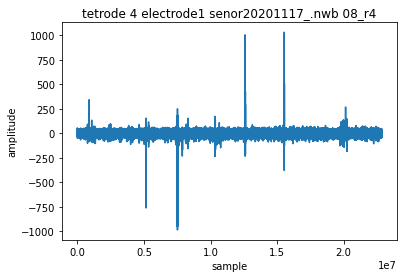

In [36]:
%matplotlib inline
plt.plot(data_test)
plt.title(f'tetrode {sort_group_id+1} electrode1 {nwb_file_name} {interval_list_name}')
plt.xlabel('sample')
plt.ylabel('amplitude')

In [26]:
# data_test_z =  np.abs(stats.zscore(data_test))
# plt.plot(data_test_z)

In [27]:
# # I want to check that 68% of our data lies between the first sd
# amp_under_sd = (abs(data[0]) <(mean_amp+sd_amp))
# (amp_under_sd==True).sum()/(int(shape[1]))
# # valid_timestamps_test = recording._timestamps 
# # valid_timestamps[int(a - half_window_points):int(a + half_window_points)] = -1





In [28]:
# plt.plot(amp_under_sd)

## Do the artifact detection! 

In [37]:

skip = False 
zscore_thresh = 50 #
amplitude_thresh=2000
proportion_above_thresh = .75 #proportion of total electrodes the artifact has to cross. 
zero_window_len= .000005 #How many seconds around each artifact to remove. Easier for me to think about samples (this *1000*samplijng rate)
    #also arbitrary for now, but should go back and recalculate after detection 


param_dict = {} #empty dictionary called param_dict
    # param_dict['skip'] = skip
param_dict['zscore_thresh'] = zscore_thresh
param_dict['amplitude_thresh'] = amplitude_thresh
param_dict['proportion_above_thresh'] = proportion_above_thresh
param_dict['zero_window_len'] = zero_window_len # 1 ms at 30 KHz, but this is of course skipped

    #we should define a variable called art_params that we can add to plots 

artifact_params = f'artifact params = z = {zscore_thresh} amp= {amplitude_thresh} prop = {proportion_above_thresh}'

    #We define how many samples on each side of artifact we wil remove. print samples and seconds removed

half_window_points = np.round(recording.get_sampling_frequency() * 1000 * zero_window_len / 2)
print(half_window_points) #how many samples of data around each artifact (per side) to be removed
print(half_window_points/(recording.get_sampling_frequency()*1000)) # = how many s of data around each artifact will be removed

    #number of electrodes that must be above threshold for artifact to count
nelect_above = np.round(proportion_above_thresh * data.shape[0])
    # print(nelect_above)
print(nelect_above)

    # #calculated twice, from two different sources of data size
    # nelect_above = np.round(proportion_above_thresh * len(recording.get_channel_ids()))
    # print(nelect_above)

    #Find indexes when amplitude is or is not crossing threshold for each electrode
above_a = np.abs(data) > amplitude_thresh
print(above_a)

    #same for z score
dataz = np.abs(stats.zscore(data, axis=1))
above_z = dataz > zscore_thresh #find when datas z scare is above specified threshold
    # print(dataz)
    # print(above_z)

    #above both: find when above z and above a are both true. Then, sum across electrodes for each sample. Find when sum > number electrodes. Find the timestamps when this occurs, and then "ravel" the array of times into 1 array
above_both = np.ravel(np.argwhere(np.sum(np.logical_or(above_z, above_a), axis=0) >= nelect_above))
valid_timestamps = recording._timestamps 
# above_both

for a in above_both:
    valid_timestamps[int(a - half_window_points):int(a + half_window_points)] = -1

    
    
#     lst_artifact_times=[]
# lst_artifact_times.append([above_both])


    #Section for vizualizing/ examining timestamps below!!

    # find and return valid intervals. Not as useful for quantifying artifact 

    # get_valid_intervals(valid_timestamps[valid_timestamps != -1], recording.get_sampling_frequency(), 1.5, 0.001)

    #is this the second chunk of data? Is this the only thing thats getting used from first chunk? 
    #two second parameters? gap length? 
    
    

75.0
2.5033950805664062e-06
3.0
[[False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]
 [False False False ... False False False]]


In [30]:
len(above_both)

94

### If you want to iterate through multiple tetrodes to compare their artifacts 

In [31]:
# # #try writing function- try with something more bite sized possibly 
# # #write a word 5 times, follow an online example 

# # #get function workin in the script 
# # #importing stuff 
# # #try calling function from the script 

# # %%time
# lst_artifact_times = []
# ref = 5
# elecs = list(range(0,11))
# elecs.remove(ref-1)

# for elec in elecs:

#     #combine everything to iterate
#     sort_group_id = elec # use sort group 2
#     sort_interval_name = sort_interval_name
#     filter_param_name = 'franklab_default_hippocampus' #change for cortex
#     artifact_param_name = 'none'
#     # interval_list_name = interval_list_name
#     lab_team = 'ac_em_xs'
#     #check lab teams table

#     key = dict()
#     key['nwb_file_name'] = nwb_file_name
#     key['sort_group_id'] = sort_group_id
#     key['filter_parameter_set_name'] = filter_param_name
#     key['sort_interval_name'] = sort_interval_name
#     key['artifact_parameter_name'] = artifact_param_name
#     key['interval_list_name'] = interval_list_name
#     key['team_name'] = lab_team

#     ssr_key = key
#     ssr_key

#     recording = SpikeSortingRecording().get_filtered_recording_extractor(ssr_key)
    
    
#     #Get the traces and save it as variable named data
#     data=recording.get_traces()
#     dataz = np.abs(stats.zscore(data, axis=1))

#     #can look at the shape of data- 
#     shape = data.shape 
#     print(shape)#(x electrodes, x samples) 
#     print(shape[1]/recording.get_sampling_frequency()) # how many seconds your recording interval is

#     skip = False 
#     zscore_thresh = 10 #
#     amplitude_thresh=200
#     proportion_above_thresh = .9 #proportion of total electrodes the artifact has to cross. 
#     zero_window_len= .000005 #How many seconds around each artifact to remove. Easier for me to think about samples (this *1000*samplijng rate)
#     #also arbitrary for now, but should go back and recalculate after detection 


#     param_dict = {} #empty dictionary called param_dict
#     # param_dict['skip'] = skip
#     param_dict['zscore_thresh'] = zscore_thresh
#     param_dict['amplitude_thresh'] = amplitude_thresh
#     param_dict['proportion_above_thresh'] = proportion_above_thresh
#     param_dict['zero_window_len'] = zero_window_len # 1 ms at 30 KHz, but this is of course skipped

#     #we should define a variable called art_params that we can add to plots 

#     artifact_params = f'artifact params = z = {zscore_thresh} amp= {amplitude_thresh} prop = {proportion_above_thresh}'

#     #We define how many samples on each side of artifact we wil remove. print samples and seconds removed

#     half_window_points = np.round(recording.get_sampling_frequency() * 1000 * zero_window_len / 2)
#     print(half_window_points) #how many samples of data around each artifact (per side) to be removed
#     print(half_window_points/(recording.get_sampling_frequency()*1000)) # = how many s of data around each artifact will be removed

#     #number of electrodes that must be above threshold for artifact to count
#     nelect_above = np.round(proportion_above_thresh * data.shape[0])
#     # print(nelect_above)
#     print(nelect_above)

#     # #calculated twice, from two different sources of data size
#     # nelect_above = np.round(proportion_above_thresh * len(recording.get_channel_ids()))
#     # print(nelect_above)

#     #Find indexes when amplitude is or is not crossing threshold for each electrode
#     above_a = np.abs(data) > amplitude_thresh
#     print(above_a)

#     #same for z score
#     dataz = np.abs(stats.zscore(data, axis=1))
#     above_z = dataz > zscore_thresh #find when datas z scare is above specified threshold
#     # print(dataz)
#     # print(above_z)

#     #above both: find when above z and above a are both true. Then, sum across electrodes for each sample. Find when sum > number electrodes. Find the timestamps when this occurs, and then "ravel" the array of times into 1 array
#     above_both = np.ravel(np.argwhere(np.sum(np.logical_and(above_z, above_a), axis=0) >= nelect_above))
#     valid_timestamps = recording._timestamps 
#     above_both

#     for a in above_both:
#         valid_timestamps[int(a - half_window_points):int(a + half_window_points)] = -1
#     lst_artifact_times.append([above_both])


# #     #Section for vizualizing/ examining timestamps below!!

# #     # find and return valid intervals. Not as useful for quantifying artifact 

# #     # get_valid_intervals(valid_timestamps[valid_timestamps != -1], recording.get_sampling_frequency(), 1.5, 0.001)

# #     #is this the second chunk of data? Is this the only thing thats getting used from first chunk? 
# #     #two second parameters? gap length? 
    
    

In [62]:
#would be nice to get 0 window length from samples- 
total_samp_rem= 75
# recording.get_sampling_frequency()/
(total_samp_rem*2)/(1000*recording.get_sampling_frequency())
.0000005

5.0067901611328125e-06

In [60]:
#here you can play around wit hthe zero window length to make sure it takes out the number of samples on each side that you want 

zero_window_len= 3.3378601074218754e-06
half_window_points = np.round(recording.get_sampling_frequency() * 1000 * zero_window_len / 2)
print(half_window_points) #how many samples of data around each artifact (per side) to be removed
print(half_window_points/(recording.get_sampling_frequency()*1000)) # = how many s of data around each artifact will be removed



50.0
1.6689300537109377e-06


In [32]:
# elec

In [33]:
# lst_artifact_times

In [34]:
# set.intersection(*map(set,lst_artifact_times))

In [35]:
# d=[]
# for ix in range(len(lst_artifact_times)):
# # for ix in range(len(lst_artifact_times)):
#     test = lst_artifact_times[ix]
#     d.append(test[0].tolist())
# # d

In [36]:
# intersection = set.intersection(*map(set,d))
# intersection

In [37]:
# intersection_using_all = intersection

In [38]:
# intersection = list(intersection)
# # intersection = next(iter(intersection))
# intersection
# # intersection[0]
# len(intersection)
# intersection.sort()

### plot the artifact times for each tetrode

In [39]:
# %matplotlib widget
# # plt.figure(figsize=(15,10))
# for ix in range(len(d)):
#     artifact_times_1_electrode = d[ix]
#     list_of_tet_nums = [ix]*len(artifact_times_1_electrode)
#     plt.scatter(artifact_times_1_electrode, list_of_tet_nums)
#     plt.title(f'artifact times over tetrode \n {artifact_params}{session_data}', fontsize=10)
#     plt.ylabel('tetrode number')
#     plt.xlabel('sample number')
#     for a in range(len(intersection)):
#         plt.axvspan(int(intersection[a] - half_window_points),int(intersection[a]+ half_window_points), color='red',label =  "_"*a + "artifact time") #label='detected artifact times')

In [38]:
#can add segment for visualizing
ix = 2 #- what portion of recording do you wanna look at? 1/3(ix=3)? 1/4(ix=4)? 
segment1= int(shape[1]/ix)
segment1

11423472

In [39]:
#should break apart nwb file name to get this 


rat = 'senor'
date = '20201117'
session = interval_list_name
segment = f'time from start = {time_from_start}, segment length = {segment_length}'

session_data = f'rat = {rat} day = {date} session = {interval_list_name} \nsegment = {segment} \n sort_group_id = {sort_group_id}- LOGICAL_OR'

In [66]:
# %matplotlib widget

# plt.plot(abs(data[0]))
# for ix in range(1,11):
#     plt.hlines(sd_amp*ix, 0,int(shape[1]), color='r')

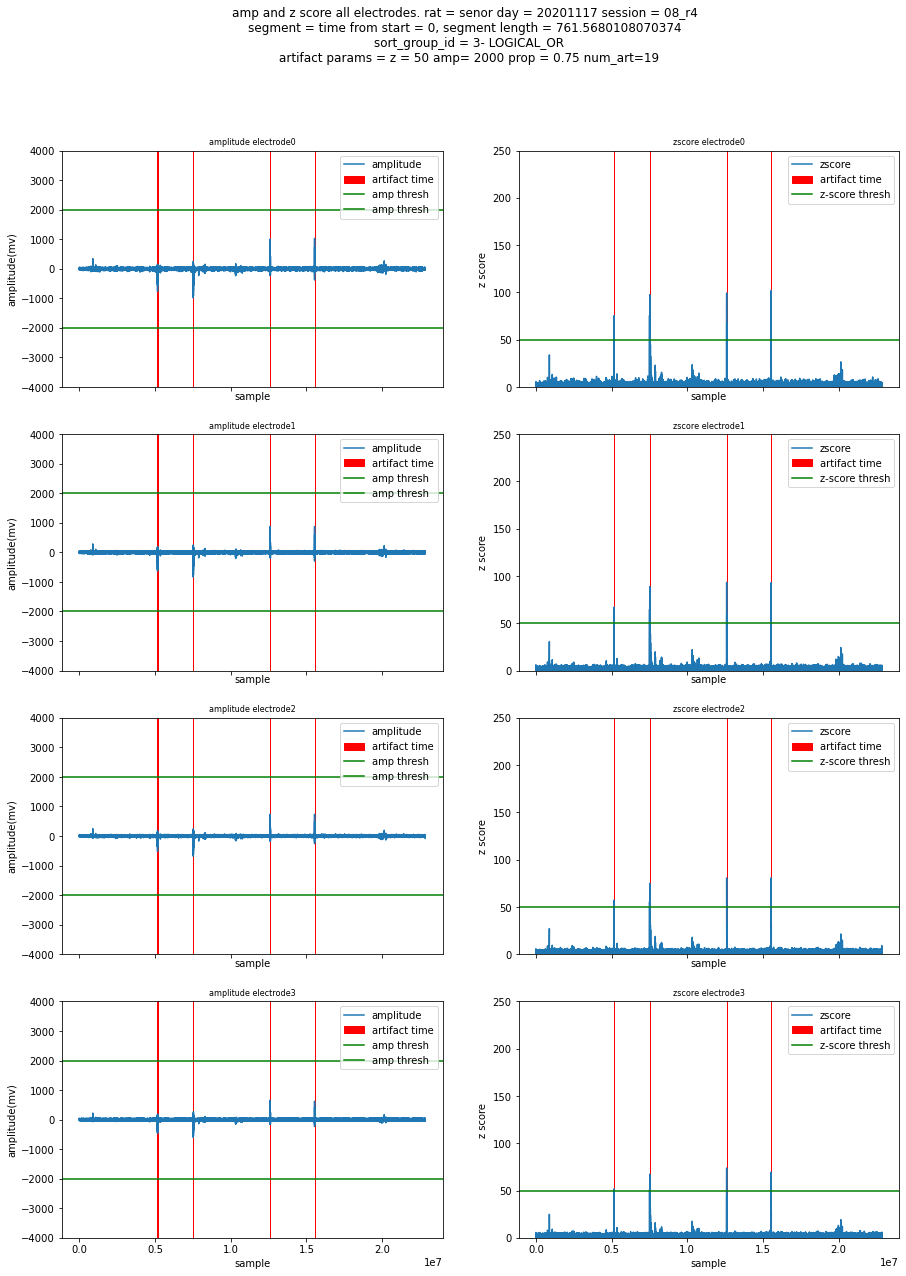

In [41]:
%matplotlib inline
fig, axs = plt.subplots(int(shape[0]),2,figsize=(15,20), sharex=True)
fig.suptitle(f'amp and z score all electrodes. {session_data}\n {artifact_params} num_art={len(above_both)}')
for ix in range(0,int(shape[0])):
#     plt.figure()
    amp_data_el = data[ix]
    zscore_data_el = dataz[ix]
    axs[ix,0].plot(amp_data_el,label='amplitude')
    # for a in above_both:
    #     axs[ix,0].axvspan(int(a - half_window_points),int(a + half_window_points), color='red', label='detected artifact times')
    axs[ix,1].plot(zscore_data_el,label='zscore')
    # for a in above_both:
    #     axs[ix,1].axvspan(int(a - half_window_points),int(a + half_window_points), color='red', label='detected artifact times')
    
    
    #uncomment these ones!
    for a in range(len(above_both)):
        axs[ix,0].axvspan(int(above_both[a] - half_window_points),int(above_both[a]+ half_window_points), color='red',label =  "_"*a + "artifact time") #label='detected artifact times')
    for a in range(len(above_both)):    
        axs[ix,1].axvspan(int(above_both[a] - half_window_points),int(above_both[a] + half_window_points), color='red',label =  "_"*a + "artifact time") #label='detected artifact times')



    axs[ix,0].set_title(f'amplitude electrode{ix}').set_fontsize(8)
    axs[ix,1].set_title(f'zscore electrode{ix}').set_fontsize(8)
    axs[ix,0].axhline(amplitude_thresh,0,len(data[ix,0:segment1]), color ='green', label = 'amp thresh')
    axs[ix,0].axhline(-1*amplitude_thresh,0,len(data[ix,0:segment1]), color ='green', label = 'amp thresh')


    axs[ix,1].axhline(zscore_thresh,0,len(dataz[ix,0:segment1]),color ='green', label='z-score thresh')
    axs[ix,0].set_ylim(-4000,4000)
    axs[ix,1].set_ylim(0,250)
    axs[ix,0].set_ylabel('amplitude(mv)')
    axs[ix,1].set_ylabel('z score')
    axs[ix,0].set_xlabel('sample')
    axs[ix,1].set_xlabel('sample') 
    axs[ix,0].legend(loc='upper right')
    axs[ix,1].legend(loc='upper right')

    # axs[ix,0].legend((amp,ampthresh)('amplitude','amp thresh'))
    # axs[ix,1].legend((zsco,zthresh)('zscore','z score thresh'))


    #ylabel

#little stuff: 
#axis labeling, legends (even though it may be diff in subplotting)



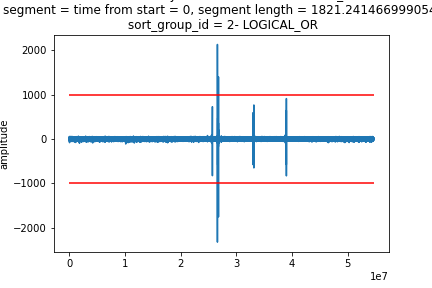

In [44]:
# # plot interactive scrolling mode. likely a good idea to shorten interval for faster loading, but can also zoom in
%matplotlib widget
ix = 0
plt.figure()
data_1_row = data[ix]
plt.plot(data_1_row)
plt.title(f'electrode {ix},\n{session_data}')
plt.ylabel('amplitude')
# plt.xlabel('sample')
# thresh= 
plt.hlines(amplitude_thresh,0,len(data_1_row),color='r')
plt.hlines((-1*amplitude_thresh),0,len(data_1_row),color='r')

In [499]:
(25/30)*5.45

4.541666666666667

## Find mean and sd for first electrode, also calculate which amplitude corresponds to certain z score

In [61]:
mean_amp = np.mean(data[0])
sd_amp = np.std((data[0]))
print(mean_amp)
print(sd_amp)
ix=45
amp_for_z = (ix*sd_amp + mean_amp)
amp_for_z

-9.796911e-05
10.106397


454.7877524108335

In [26]:
sd_amp

18.441404

# Define thresholds for artifact removal

In [ ]:
# skip = False 
# zscore_thresh = 10 #
# amplitude_thresh=150
# proportion_above_thresh = .9 #proportion of total electrodes the artifact has to cross. 
# zero_window_len= .000005 #How many seconds around each artifact to remove. Easier for me to think about samples (this *1000*samplijng rate)
# #also arbitrary for now, but should go back and recalculate after detection 


# param_dict = {} #empty dictionary called param_dict
# # param_dict['skip'] = skip
# param_dict['zscore_thresh'] = zscore_thresh
# param_dict['amplitude_thresh'] = amplitude_thresh
# param_dict['proportion_above_thresh'] = proportion_above_thresh
# param_dict['zero_window_len'] = zero_window_len # 1 ms at 30 KHz, but this is of course skipped

# #we should define a variable called art_params that we can add to plots 

# artifact_params = f'artifact params = z = {zscore_thresh} amp= {amplitude_thresh} prop = {proportion_above_thresh}'

# #We define how many samples on each side of artifact we wil remove. print samples and seconds removed

# half_window_points = np.round(recording.get_sampling_frequency() * 1000 * zero_window_len / 2)
# print(half_window_points) #how many samples of data around each artifact (per side) to be removed
# print(half_window_points/(recording.get_sampling_frequency()*1000)) # = how many s of data around each artifact will be removed

# #number of electrodes that must be above threshold for artifact to count
# nelect_above = np.round(proportion_above_thresh * data.shape[0])
# # print(nelect_above)
# print(nelect_above)

# # #calculated twice, from two different sources of data size
# # nelect_above = np.round(proportion_above_thresh * len(recording.get_channel_ids()))
# # print(nelect_above)

# #Find indexes when amplitude is or is not crossing threshold for each electrode
# above_a = np.abs(data) > amplitude_thresh
# print(above_a)

# #same for z score
# dataz = np.abs(stats.zscore(data, axis=1))
# above_z = dataz > zscore_thresh #find when datas z scare is above specified threshold
# # print(dataz)
# # print(above_z)

# #above both: find when above z and above a are both true. Then, sum across electrodes for each sample. Find when sum > number electrodes. Find the timestamps when this occurs, and then "ravel" the array of times into 1 array
# above_both = np.ravel(np.argwhere(np.sum(np.logical_and(above_z, above_a), axis=0) >= nelect_above))
# valid_timestamps = recording._timestamps 
# above_both

# for a in above_both:
#     valid_timestamps[int(a - half_window_points):int(a + half_window_points)] = -1
# #Section for vizualizing/ examining timestamps below!!

# # find and return valid intervals. Not as useful for quantifying artifact 

# # get_valid_intervals(valid_timestamps[valid_timestamps != -1], recording.get_sampling_frequency(), 1.5, 0.001)

# #is this the second chunk of data? Is this the only thing thats getting used from first chunk? 
# #two second parameters? gap length? 

### Visualize results- what was removed? 

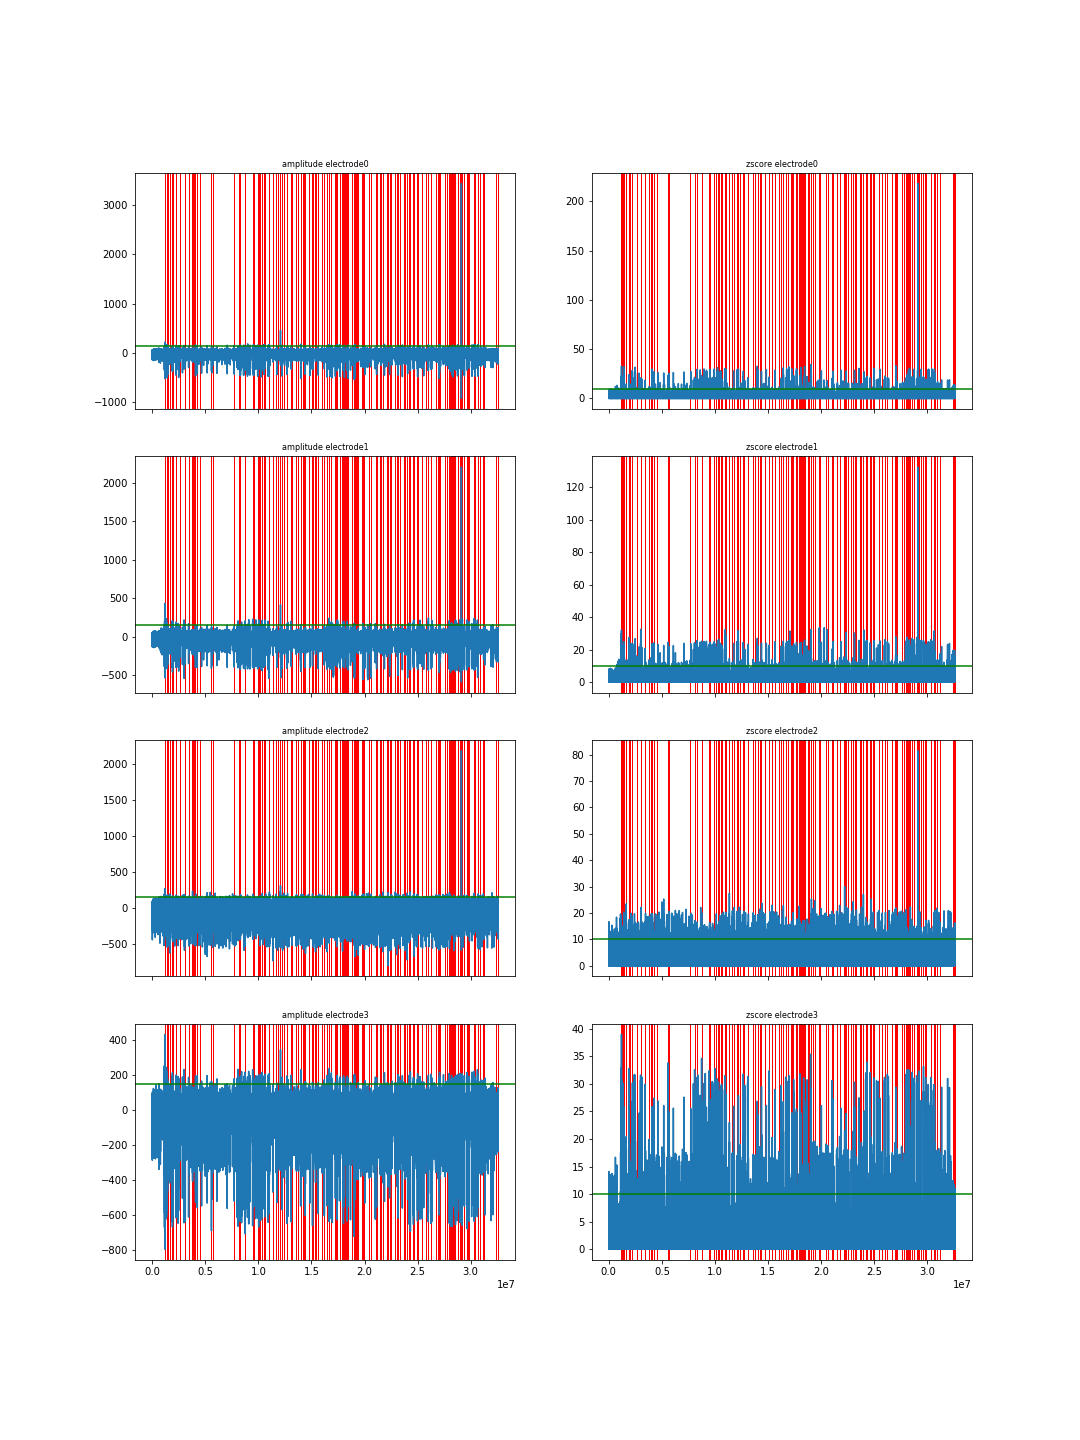

In [71]:
# fig, axs = plt.subplots(int(shape[0]),2,figsize=(15,20), sharex=True)
# # fig.suptitle(f'amp and z score all electrodes. {session_data}')
# for ix in range(0,int(shape[0])):
# #     plt.figure()
#     amp_data_el = data[ix]
#     zscore_data_el = dataz[ix]
#     axs[ix,0].plot(amp_data_el)
#     for a in above_both:
#         axs[ix,0].axvspan(int(a - half_window_points),int(a + half_window_points), color='red', label='detected artifact times')
#     axs[ix,1].plot(zscore_data_el)
#     for a in above_both:
#         axs[ix,1].axvspan(int(a - half_window_points),int(a + half_window_points), color='red', label='detected artifact times')
#     axs[ix,0].set_title(f'amplitude electrode{ix}').set_fontsize(8)
#     axs[ix,1].set_title(f'zscore electrode{ix}').set_fontsize(8)
#     axs[ix,0].axhline(amplitude_thresh,0,len(data[ix]), color ='green')
#     axs[ix,1].axhline(zscore_thresh,0,len(dataz[ix]),color ='green')
#     #ylabel

# #little stuff: 
# #axis labeling, legends (even though it may be diff in subplotting)


## Histograms 

Text(0.5, 1.0, 'histogram of all amplitudes for electrode 0 \n artifact params = z = 50 amp= 1500 prop = 1\n rat = senor day = 20201030 session = 02_r1 \nsegment = time from start = 0, segment length = 1198.8527660369873 \n sort_group_id = 8- LOGICAL_OR\n  bin width = 10')

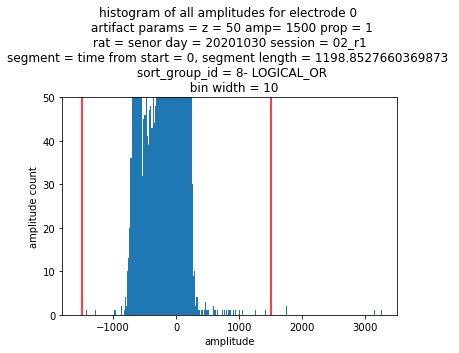

In [39]:
#hist of 1 electrodes amplitude counts. Important- turn on and off ylim/change values. 

plt.figure()
electrode = 0
# plt.hist(data[electrode])
plt.ylim(0,50)
plt.ylabel('amplitude count')
plt.xlabel('amplitude')
plt.vlines(param_dict.get('amplitude_thresh'),0,1000000, color='red')
plt.vlines(-1*param_dict.get('amplitude_thresh'),0,1000000, color='red')
w = 10
n = math.ceil((data[electrode].max() - data[electrode].min())/w) #number of bins
ax = plt.hist(data[electrode], bins = n)
plt.title(f'histogram of all amplitudes for electrode {electrode} \n {artifact_params}\n {session_data}\n  bin width = {w}')


#non parametric ways to find outliers
# maybe the data is mostly normal.. (theres tests for that) 
#amp is raw- anything gigantic. z score is relative to center of data (could change on sessions, days etc) (diff electrodes) 
#thinking in z scores here! amplitude is a catch all. z score might differ. 

#write own functin for trnalsation of amplitude to z score 
#find the mean and sd 
#writing a z scoring function. 

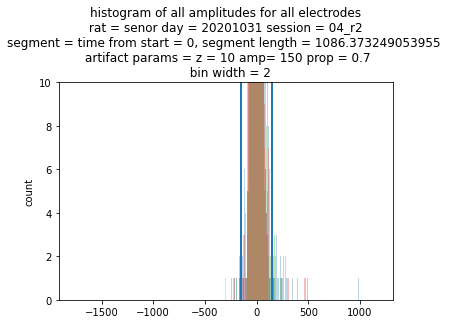

In [11]:
# #histogram each electrodes amplitude profile, with all electrodes overlaied. 
# #Problems (because they arent summed accross electrodes)- I want them to be summed, because then we can see then events of simlar large size span multiple electrodes
# plt.figure()
# for ix in range(0,shape[0]):
#     # plt.figure()
#     # plt.hist(data[ix], alpha=.3)
#     plt.ylim(0,10)
#     plt.ylabel('count')
#     plt.vlines(amplitude_thresh,0,1000)
#     plt.vlines(-1*amplitude_thresh,0,1000)
#     w = 2
#     n = math.ceil((data[ix].max() - data[ix].min())/w) #number of bins
#     ax = plt.hist(data[ix], bins = n, alpha =.3)
#     plt.title(f'histogram of all amplitudes for all electrodes\n {session_data} \n {artifact_params}\n  bin width = {w}')

# #fix axes 
# #calc hist for every col of data instea of miking it 1 row 
# #sampless/bin vs proportion
# #being shared across 

Text(0.5, 1.0, 'histogram of zscores for electrode 0\n rat = senor day = 20201030 session = 02_r1 \nsegment = time from start = 0, segment length = 1198.8527660369873 \n sort_group_id = 8- LOGICAL_OR \n artifact params = z = 50 amp= 1500 prop = 1\n  bin width = 1')

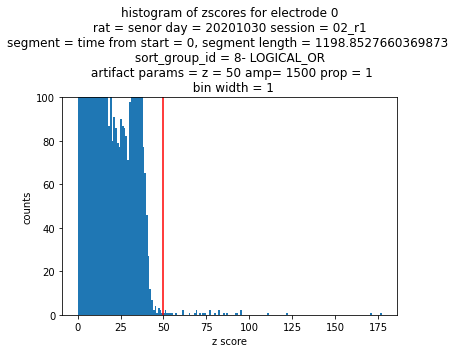

In [41]:
%matplotlib inline
plt.figure()
# plt.hist(dataz[electrode])
plt.vlines(zscore_thresh,0,1000, color='red')
plt.ylim(0,100)
plt.xlabel('z score')
plt.ylabel('counts')
w = 1
n = math.ceil((dataz[electrode].max() - dataz[electrode].min())/w) #number of bins
ax = plt.hist(dataz[electrode], bins = n)
plt.title(f'histogram of zscores for electrode {electrode}\n {session_data} \n {artifact_params}\n  bin width = {w}')

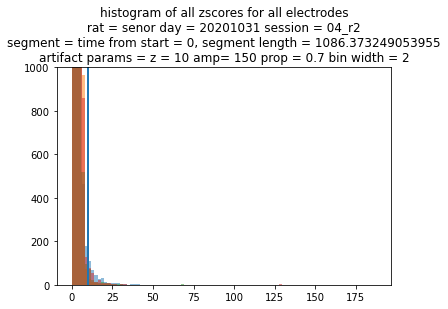

In [16]:
# #this will plot all of the z score counts from all electrode overlaid. 
# plt.figure()
# for ix in range(0,shape[0]):
#     # plt.figure()
#     # plt.hist(dataz[ix],alpha=.5)
#     plt.vlines(zscore_thresh,0,1000)
#     plt.ylim(0,1000)
#     w = 2
#     n = math.ceil((dataz[ix].max() - dataz[ix].min())/w) #number of bins
#     ax = plt.hist(dataz[ix], bins = n, alpha=.5)
#     plt.title(f'histogram of all zscores for all electrodes\n {session_data}\n{artifact_params} bin width = {w}')



## For 1 electrode from sort group, what do all the artifacts look like 

In [ ]:
# #This will plot all artifacts on 1 electrode

electrode = 0 
center = 100
for ix in range(len(above_both)):
    #plt the 100 points on either side of the artifact
    plt.figure()
    data_sample = data[electrode,(above_both[ix]-center):(above_both[ix]+center)]
    plt.plot(data_sample)
    plt.xlabel('samples around artifact time')
    plt.ylabel('amplitude')
    plt.title(f'amplitude 200 samples around each detected artifact time \n {session_data} \n {artifact_params} electrode{electrode}\n artifact num = {above_both[ix]}')
    art_start=center-half_window_points
    art_end=center+half_window_points
    plt.axvspan(art_start,art_end, color='red', alpha=0.5)

# #time window rather than sample will be useful! How long is a spike? (x axis labeling- seconds before and after) 
# #average across electrodes
# #some spread around the avg? what part of the artifact is similar?
# #average with standard eroor around it! 
# intersection=(intersection).sort()
# electrode = 0 
# center = 100
# for ix in range(len(intersection)):
#     #plt the 100 points on either side of the artifact
#     plt.figure()
#     data_sample = data[electrode,(intersection[ix]-center):(intersection[ix]+center)]
#     plt.plot(data_sample)
#     plt.xlabel('samples around artifact time')
#     plt.ylabel('amplitude')
#     plt.title(f'amplitude 200 samples around each detected artifact time \n {session_data} \n {artifact_params} electrode{electrode}\n artifact_num {intersection[ix]}')
#     art_start=center-half_window_points
#     art_end=center+half_window_points
#     plt.axvspan(art_start,art_end, color='red', alpha=0.5)



## plot a single artifact across all electrodes

In [144]:
# intersection

In [ ]:
#This will plot one artifact across all electrodes
artifact = 0
center =100
for ix in range(int(data.shape[0])):
    #plt the 100 points on either side of the artifact
    plt.figure()
    data_sample = data[ix,(above_both[artifact]-center):(above_both[artifact]+center)]
    plt.plot(data_sample)
    plt.xlabel('samples areound artifact time')
    plt.hlines(amplitude_thresh,0,len(data_sample))
    plt.ylabel('amplitude')
    art_start=center-half_window_points
    art_end=center+half_window_points
    plt.axvspan(art_start,art_end, color='red', alpha=0.5)
    plt.title(f'amplitude {center*2} seconds around 1 artifact time on each electrode \n {session_data} \n{artifact_params}\nelectrode{ix}, artifact sample = {above_both[artifact]}')

### look at events that crossed threshold on 1 electrode but not overall,
#### useful for seeing if thresholds should be altered

In [456]:
electrode = 0
above_a1= data[electrode]>=amplitude_thresh
above_z1=dataz[electrode]>=zscore_thresh
above_both1 = np.ravel(np.argwhere(np.logical_or(above_z1, above_a1)))

In [346]:
# len(above_both)
# 122-71

51

In [377]:
len(data[electrode])

34959124

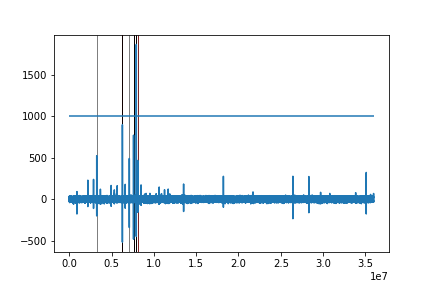

In [457]:
%matplotlib widget
plt.plot(data[electrode])
for a in above_both:
    plt.axvspan(int(a - half_window_points),int(a + half_window_points), color='red', alpha=0.7)
for a in above_both1:
    plt.axvspan(int(a - half_window_points),int(a + half_window_points), color='black', alpha=0.5)
plt.hlines(amplitude_thresh,0,len(data[electrode]))
#Z score space!!! 
#lower prioirty- come back to something like this later

In [458]:
# #find events detected on 1st electrode, but not overall
on1_not_all = list(set(above_both1) - set(above_both)) 
len(on1_not_all)

8

In [11]:
# #find events detected overall that were not detected on electrode 0
# on_all_not1=list(set(above_both) - set(above_both1))

In [ ]:
# #plt all events detected on electrode 0 that were not included overall (look pretty artifact-y)
%matplotlib inline
for ix in range(len(on1_not_all)):
    plt.figure()
    data_sample = data[0,(on1_not_all[ix])-100:(on1_not_all[ix])+100]
    plt.plot(data_sample)
    plt.xlabel('sample')
    plt.ylabel('amplitude')
    plt.title(f'event detected on 1 electrode, but not included overall, amplitude 200 seconds around \n {session_data} \n {artifact_params} electrode 0 \n artifact number={on1_not_all[ix]},fontsize=10')
    # plt.axvspan((data[0,(on1_not_all[ix])]) - half_window_points,(data[0,(on1_not_all[ix])]) + half_window_points, color='red', label='detected artifact times')


In [459]:
on1_not_all.sort()
on1_not_all

[3249401, 6283742, 7101192, 7599240, 7925774, 7925779, 7925782, 8102672]

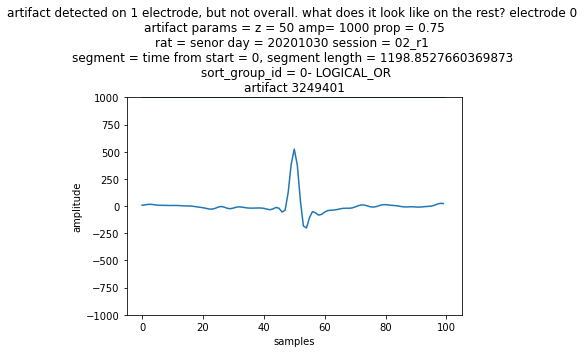

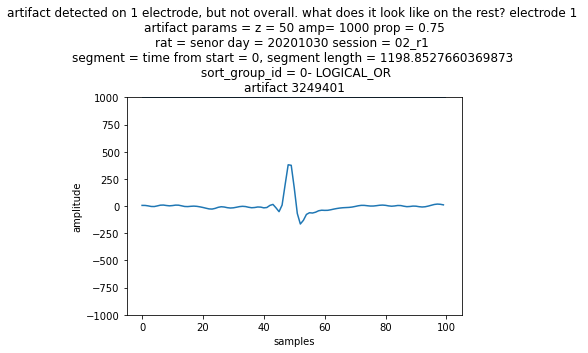

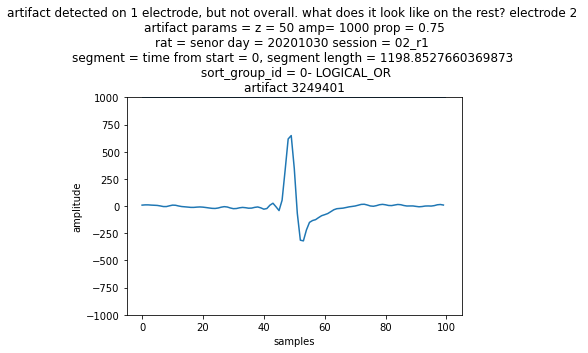

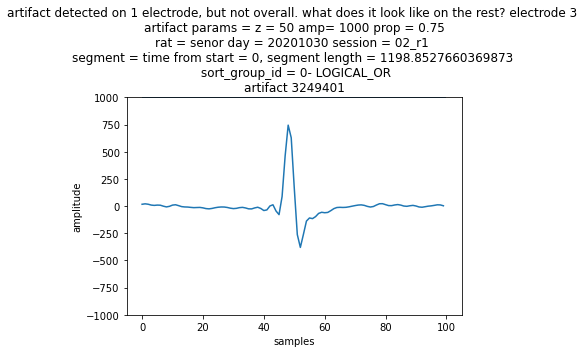

In [460]:
# on1_not_all
%matplotlib inline
art_num = 0
for ix in range((shape[0])):
    data_sample = data[ix,(on1_not_all[art_num])-50:(on1_not_all[art_num])+50]
    plt.figure()
    plt.plot(data_sample)
    plt.ylim(-1000,1000)
    plt.hlines(amplitude_thresh,0,len(data_sample))
    plt.title(f'artifact detected on 1 electrode, but not overall. what does it look like on the rest? electrode {ix} \n{artifact_params}\n{session_data}\nartifact {on1_not_all[art_num]}')
    plt.xlabel('samples')
    plt.ylabel('amplitude')



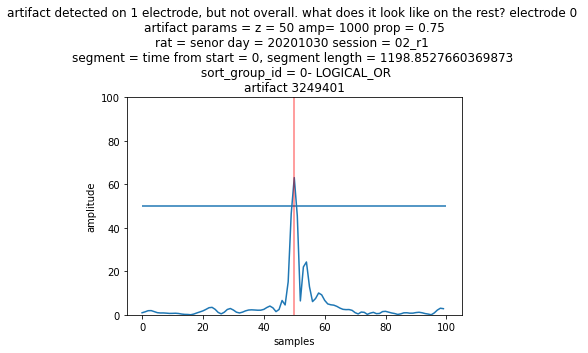

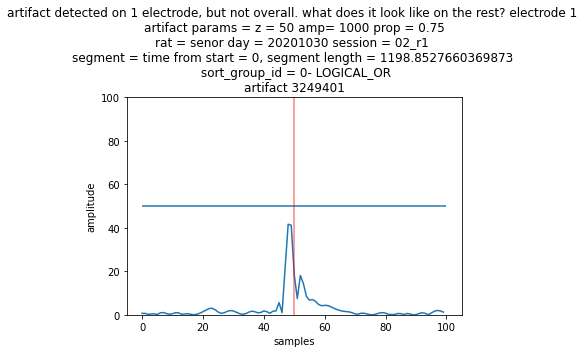

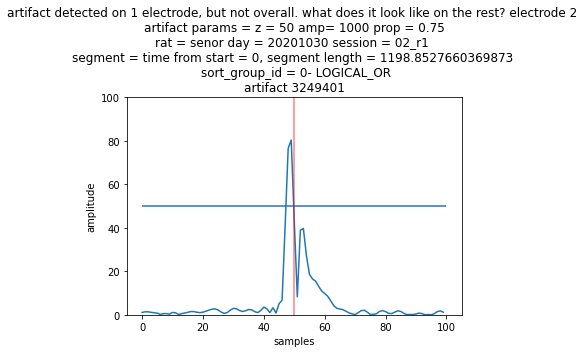

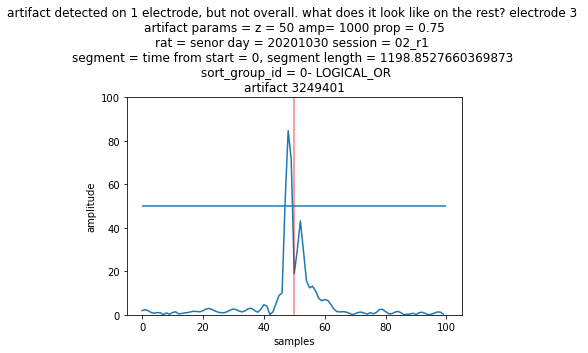

In [462]:
%matplotlib inline
art_num = 0
for ix in range((shape[0])):
    data_sample = dataz[ix,(on1_not_all[art_num])-50:(on1_not_all[art_num])+50]
    plt.figure()
    plt.plot(data_sample)
    plt.ylim(0,100)
    plt.hlines(zscore_thresh,0,len(data_sample))
    plt.title(f'artifact detected on 1 electrode, but not overall. what does it look like on the rest? electrode {ix} \n{artifact_params}\n{session_data}\nartifact {on1_not_all[art_num]}')
    plt.xlabel('samples')
    plt.ylabel('amplitude')
    plt.vlines(50,0,100,color='r',alpha=.5)



In [27]:
# for ix in range(len(on_all_not1)):
#     plt.figure()
#     data_sample = data[0,(on_all_not1[ix])-100:(on_all_not1[ix])+100]
#     plt.plot(data_sample)
#     plt.xlabel('sample')
#     plt.ylabel('amplitude')
#     plt.ylim(-50,150)
#     plt.title(f'event detected on all. but not on this electrode, amplitude 200 seconds around \n {session_data} \n {artifact_params} electrode 0, artifact {ix}')



Z scores

In [ ]:
# #plot z scores around each artifact on electrode 0
# electrode = 0 
# center= 100
# for ix in range(len(above_both)):
#     #plt the 100 points on either side of the artifact
#     plt.figure()
#     data_sample = dataz[electrode,(above_both[ix]-center):(above_both[ix]+center)]
#     plt.plot(data_sample)
#     plt.xlabel('samples around artifact time')
#     plt.ylabel('amplitude')
#     plt.title(f'amplitude 200 samples around each detected artifact time \n {session_data} \n {artifact_params} electrode{electrode}')
#     art_start=center-half_window_points
#     art_end=center+half_window_points
#     plt.axvspan(art_start,art_end, color='red', alpha=0.5)

In [32]:
# #all events detected on electrode 0 that were not included overall
# #just visualizing the events that crossed thresh on electrode 1
# %matplotlib inline
# center=100
# for ix in range(len(on1_not_all)):
#     plt.figure()
#     data_sample = dataz[0,(on1_not_all[ix])-center:(on1_not_all[ix])+center]
#     plt.plot(data_sample)
#     plt.xlabel('sample')
#     plt.ylabel('zscore')
#     plt.title(f'event detected on 1 electrode, but not included overall, zscore 200 seconds around \n {session_data} \n {artifact_params} electrode 0',fontsize=10)
#     art_start=center-half_window_points
#     art_end=center+half_window_points
#     plt.axvspan(art_start,art_end, color='red', alpha=0.5)





In [33]:
# #visualizing what a single artifact that crossed on 1(at least) looks like on the rest of electrodes

# #can change the value in data sample, for on1_not_all[___] to look at different artifacts
# on1_not_all
# %matplotlib inline

# for ix in range((shape[0])):
#     data_sample = dataz[ix,(on1_not_all[1])-100:(on1_not_all[1])+100]
#     plt.figure()
#     plt.plot(data_sample)
#     # plt.ylim(-75,160)
#     plt.hlines(zscore_thresh,0,len(data_sample))
#     plt.title(f'artifact detected on 1 electrode, but not overall. what does it look like on the rest? electrode {ix} \n{artifact_params}\n{session_data}')
#     plt.xlabel('samples')
#     plt.ylabel('zscore')

In [98]:
# #okay so its clear that even though it wasnt detected on all, it was present on many. how many does it cross? 
# zscore_at_time=[]
# first_on_1 = on1_not_all[1]
# for ix in range(shape[0]):
#     zscore_at_time.append(dataz[ix,first_on_1])

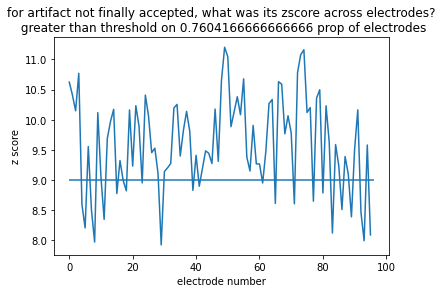

In [99]:
# #for an artifact, how many electrodes did it cross thresh on? or at least what was z score?/amp?
# plt.plot(zscore_at_time)
# greater_than=[]
# for ix in range(len(zscore_at_time)):
#     greater_than.append(zscore_at_time[ix] > zscore_thresh)
# plt.title(f'for artifact not finally accepted, what was its zscore across electrodes?\n greater than threshold on {sum(greater_than)/len(zscore_at_time)} prop of electrodes')
# plt.xlabel('electrode number')
# plt.ylabel('z score')
# plt.hlines(zscore_thresh, 0, len(zscore_at_time))

In [91]:
# #okay so its clear that even though it wasnt detected on all, it was on most. how many does it cross? ampliutude
# amp_at_time=[]
# first_on_1 = on1_not_all[1]
# for ix in range(shape[0]):
#     amp_at_time.append(data[ix,first_on_1])

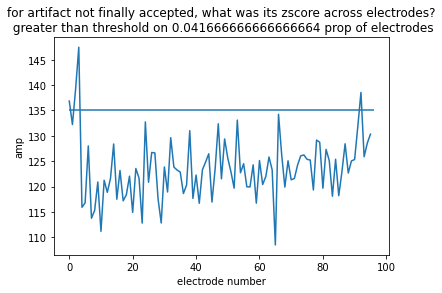

In [92]:
# plt.plot(amp_at_time)
# greater_than=[]
# for ix in range(len(amp_at_time)):
#     greater_than.append(amp_at_time[ix] > amplitude_thresh)
# plt.title(f'for artifact not finally accepted, what was its zscore across electrodes?\n greater than threshold on {sum(greater_than)/len(zscore_at_time)} prop of electrodes')
# plt.xlabel('electrode number')
# plt.ylabel('amp')
# plt.hlines(amplitude_thresh, 0, len(amp_at_time))

## Spanning electrodes

In [ ]:
#look at amplitudes on electrodes at artifact time. get a plot for each artifact with the amplitude on each electrode at the artifact time. 
#Visualize how many electrodes crossed the amplitude thresh at artifact time 
for artifact in range(len(above_both)):
    amp_on_electrode=[]
    plt.figure()
    for ix in range(data.shape[0]):
        #plt the 100 points on either side of the artifact
        amp_on_electrode.append(data[ix,above_both[artifact]])

        #data_sample = data[ix,(above_both[artifact]-100):(above_both[artifact]+100)]
    plt.plot(amp_on_electrode)
    plt.hlines(amplitude_thresh,0,len(amp_on_electrode))
    plt.ylabel('amplitude')
    plt.xlabel('sample')
    plt.title(f'for every electrode for 1 artifact time= {above_both[artifact]}, what is amplitude?\n {session_data}\n {artifact_params}')      

In [44]:
#for every artifact, how many electrodes cross thresh at artifact time?
artifact_prop_el_x_thresh=[]
artifact_number_el_x_thresh=[]
for artifact in range(len(above_both)):
    amp_on_electrode=[]
    for ix in range(data.shape[0]):
            #plt the 100 points on either side of the artifact
        amp_on_electrode.append(data[ix,above_both[artifact]])
        amp_greater=[]
        for ind in range(len(amp_on_electrode)):
            if abs(amp_on_electrode[ind]) >= amplitude_thresh:
                amp_greater.append(1)
            else:
                amp_greater.append(0)
    artifact_prop_el_x_thresh.append(sum(amp_greater)/len(amp_greater))
    artifact_number_el_x_thresh.append(sum(amp_greater))
    #scatter rather than continuous 

Text(0, 0.5, 'proportion of electrodes that cross amp thresh')

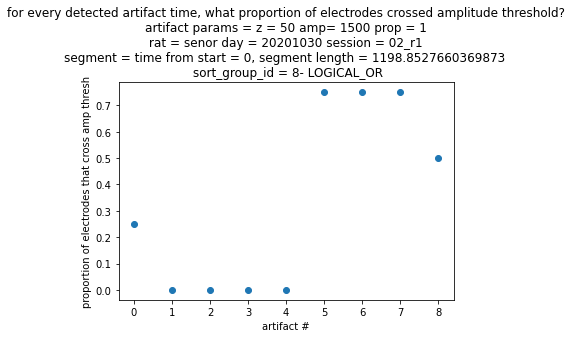

In [45]:
#for every artifact, what proportion of electrodes crossed thresh?
plt.scatter(range(len(artifact_prop_el_x_thresh)),artifact_prop_el_x_thresh)
plt.title(f'for every detected artifact time, what proportion of electrodes crossed amplitude threshold?\n{artifact_params}\n {session_data}')
plt.xlabel('artifact #')
plt.ylabel('proportion of electrodes that cross amp thresh')

In [46]:
import statistics
avg_number_el_xed = statistics.mean(artifact_number_el_x_thresh)
avg_number_el_xed
avg_prop_el_xed = statistics.mean(artifact_prop_el_x_thresh)

In [47]:
avg_number_el_xed

1.3333333333333333

In [48]:
avg_prop_el_xed #average proportion of electrodes that artifacts crossed thresh on 

0.3333333333333333

In [49]:
#same but for z score 
artifact_prop_el_x_zthresh=[]
artifact_number_el_x_zthresh=[]
for artifact in range(len(above_both)):
    z_on_electrode=[]
    for ix in range(data.shape[0]):
            #plt the 100 points on either side of the artifact
        z_on_electrode.append(dataz[ix,above_both[artifact]])
        z_greater=[]
        for ind in range(len(z_on_electrode)):
            if z_on_electrode[ind] >= zscore_thresh:
                z_greater.append(1)
            else:
                z_greater.append(0)
    artifact_prop_el_x_zthresh.append(sum(z_greater)/len(z_greater))
    artifact_number_el_x_zthresh.append(sum(z_greater))

Text(0, 0.5, 'proportion of electrodes that x z thresh')

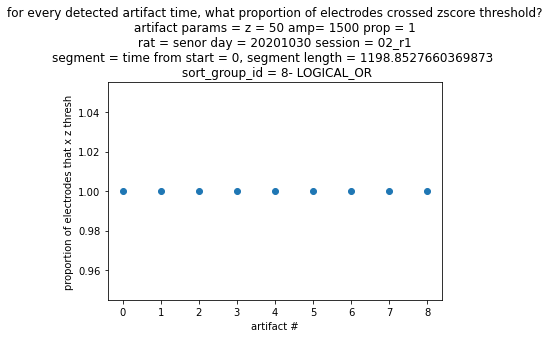

In [50]:
plt.scatter(range(len(artifact_prop_el_x_zthresh)),artifact_prop_el_x_zthresh)
plt.title(f'for every detected artifact time, what proportion of electrodes crossed zscore threshold?\n {artifact_params} \n {session_data}')
plt.xlabel('artifact #')
plt.ylabel('proportion of electrodes that x z thresh')

In [40]:
avg_number_el_xed_z = statistics.mean(artifact_number_el_x_zthresh)
avg_number_el_xed_z
avg_prop_el_xed_z = statistics.mean(artifact_prop_el_x_zthresh)

In [41]:
avg_number_el_xed_z

3.912087912087912

In [42]:
avg_prop_el_xed_z

0.978021978021978

## Artifact Info

In [83]:
#how many artifacts? 
num_artifacts = len(above_both)
num_artifacts

9

Text(0, 0.5, 'amplitude')

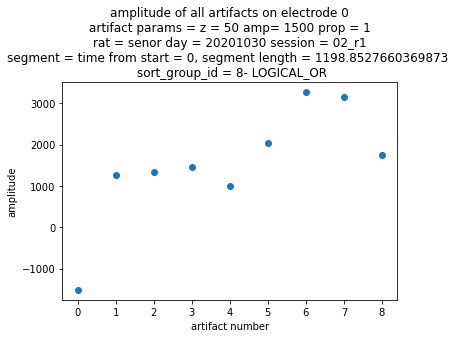

In [52]:
#amplitude of artifacts on a single electrode
electrode = 0
all_artifact_el_0=[]
for ix in range(len(above_both)):
    amplitude = data[electrode,above_both[ix]]
    all_artifact_el_0.append(amplitude)
plt.figure()
plt.scatter(range(len(all_artifact_el_0)),all_artifact_el_0)
plt.title(f'amplitude of all artifacts on electrode {electrode}\n {artifact_params} \n {session_data}')
plt.xlabel('artifact number')
plt.ylabel('amplitude')

Text(0, 0.5, 'z score')

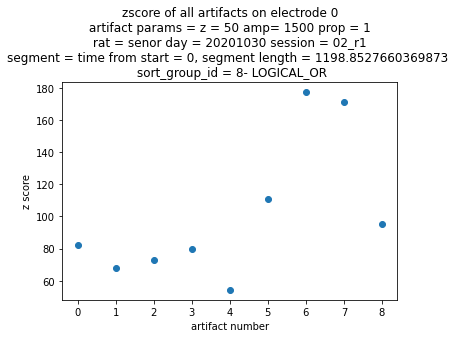

In [53]:
#z scores of each artifact on a single electrode
electrode = 0
all_zscore_el_0=[]

# for electrode in range(data.shape[0]):
for ix in range(len(above_both)):
    zscore = dataz[electrode,above_both[ix]]
    all_zscore_el_0.append(zscore)
plt.figure()
plt.scatter(range(len(all_zscore_el_0)),all_zscore_el_0)
plt.title(f'zscore of all artifacts on electrode {electrode}\n {artifact_params} \n {session_data}')
plt.xlabel('artifact number')
plt.ylabel('z score')

In [54]:
#the mean of the artifacts on this 1 electrode
avg_amp_1_el = statistics.mean(all_zscore_el_0)
avg_amp_1_el

101.30497

In [11]:
#Maybe this should have been looking at the same artifact, its mean across all electrodes- whats the average mean of artifact amplitude? 
# a box plot of these would also be interesting. Whats its spread? got some of that from previous notebook.
#but also can narrow down to 1 number. what is the average amplitude of all artifacts accross all electrodes?


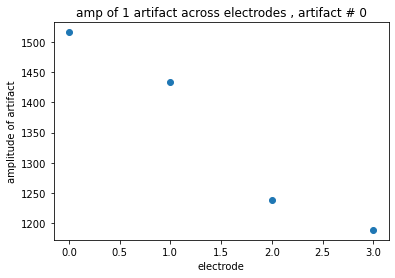

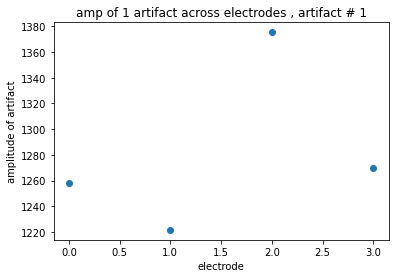

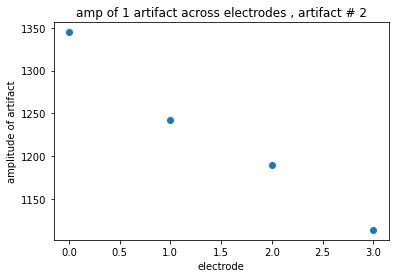

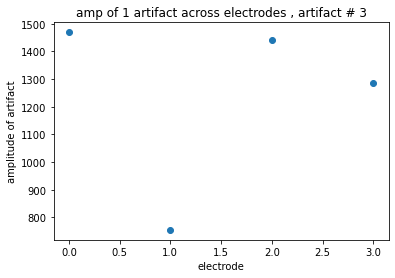

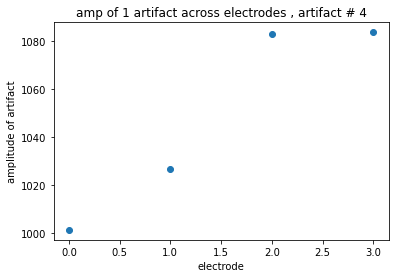

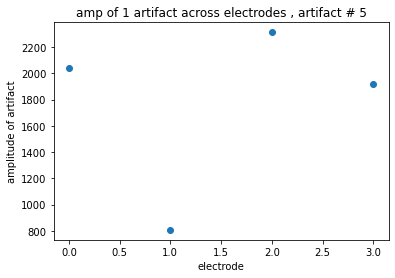

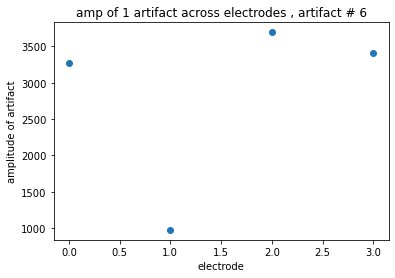

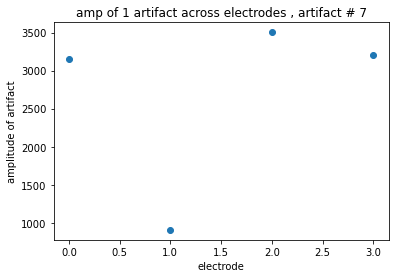

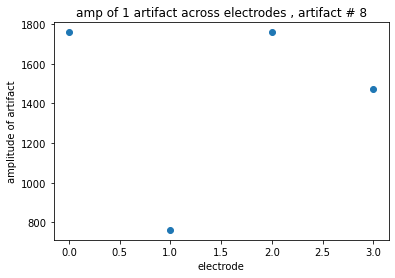

In [55]:
#this will plot the amplitude of each artifact across all electrodes
mean_amp_art=[]
# plt.figure()
for ix in range(len(above_both)):
    all_amp_el_0=[]
    for electrode in range(data.shape[0]):
        amp = abs(data[electrode,above_both[ix]])
        all_amp_el_0.append(amp)
    mean_amp_art.append(statistics.mean(all_amp_el_0))
    plt.figure()
    plt.scatter(range(len(all_amp_el_0)),all_amp_el_0)
    plt.title(f'amp of 1 artifact across electrodes , artifact # {ix}')
    plt.xlabel('electrode')
    plt.ylabel('amplitude of artifact')
    # plt.ylim(100,250)#set based on this one data set

Text(0.5, 0, 'artifact number')

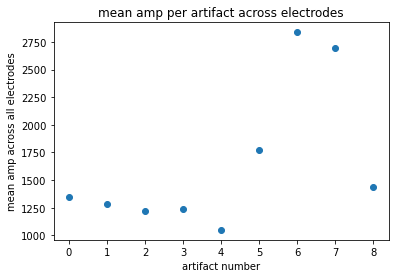

In [56]:
#look at the average amplitude of each artifact across electrodes
plt.figure()
plt.scatter(range(len(mean_amp_art)),mean_amp_art)
plt.title('mean amp per artifact across electrodes')
plt.ylabel('mean amp across all electrodes')
plt.xlabel('artifact number')

In [ ]:
mean_z_score_art=[]
for ix in range(len(above_both)):
    all_zscore_el_0=[]
    for electrode in range(data.shape[0]):
        zscore = dataz[electrode,above_both[ix]]
        all_zscore_el_0.append(zscore)
    mean_z_score_art.append(statistics.mean(all_zscore_el_0))
    plt.figure()
    plt.scatter(range(len(all_zscore_el_0)),all_zscore_el_0)
    plt.title(f'zscore of 1 artifact across electrodes , artifact # {ix}')
    plt.ylabel('zscore')
    plt.xlabel('electrode number')
    # plt.ylim(7,17)#set based on this one data set

Text(0.5, 0, 'artifact number')

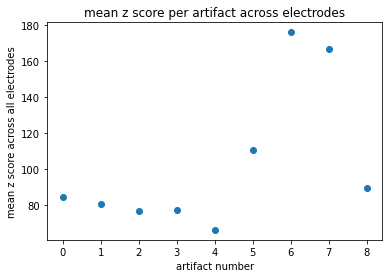

In [58]:
mean_z_score_art
plt.figure()
plt.scatter(range(len(mean_z_score_art)),mean_z_score_art)
plt.title('mean z score per artifact across electrodes')
plt.ylabel('mean z score across all electrodes')
plt.xlabel('artifact number')

In [59]:
#average of all artifact amplitudes
mean_of_all_art_amps =statistics.mean(mean_amp_art)
print(mean_of_all_art_amps)

1652.5696


In [60]:
mean_of_all_z_arts =statistics.mean(mean_z_score_art)
print(mean_of_all_z_arts)

102.989235


# this will find how much time/what proportion was removed from the recording

In [61]:
sum(valid_timestamps==-1)

2084

In [62]:
interval_list

array([[1.60407821e+09, 1.60407941e+09]])

In [63]:
valid_timestamps

array([1.60407821e+09, 1.60407821e+09, 1.60407821e+09, ...,
       1.60407941e+09, 1.60407941e+09, 1.60407941e+09])

In [64]:
times = get_valid_intervals(valid_timestamps[valid_timestamps != -1], recording.get_sampling_frequency(), 1.5, 0.001)

In [65]:
times
# times[1][0]
# times[0]

array([[1.60407821e+09, 1.60407824e+09],
       [1.60407824e+09, 1.60407828e+09],
       [1.60407828e+09, 1.60407830e+09],
       [1.60407830e+09, 1.60407832e+09],
       [1.60407832e+09, 1.60407833e+09],
       [1.60407833e+09, 1.60407837e+09],
       [1.60407837e+09, 1.60407843e+09],
       [1.60407843e+09, 1.60407844e+09],
       [1.60407844e+09, 1.60407846e+09],
       [1.60407846e+09, 1.60407847e+09],
       [1.60407847e+09, 1.60407848e+09],
       [1.60407848e+09, 1.60407849e+09],
       [1.60407849e+09, 1.60407856e+09],
       [1.60407856e+09, 1.60407941e+09]])

In [66]:
times[1][0]-times[0][1]

0.00820016860961914

In [67]:
#find the time between each set of valid intervals (find out how much time was removed)
time_bet_int=[]
for ix in range(len(times)):
    if ix < (len(times)-1):
        time_bet_int.append(times[ix+1][0]-times[ix][1])
    if ix == len(times): 
        time_bet_int.append(times[ix][0]-times[ix-1][1])

In [68]:
time_bet_int

[0.00820016860961914,
 0.005166769027709961,
 0.005166769027709961,
 0.00520014762878418,
 0.0050334930419921875,
 0.005166530609130859,
 0.005166530609130859,
 0.0050334930419921875,
 0.00536656379699707,
 0.005166769027709961,
 0.005066871643066406,
 0.005133390426635742,
 0.005033254623413086]

In [69]:
samp_bet_int=[]
for ix in range(len(time_bet_int)):
    samp_bet_int.append(time_bet_int[ix]*recording.get_sampling_frequency())

In [70]:
samp_bet_int

[245.67142857142858,
 154.79285714285714,
 154.79285714285714,
 155.79285714285714,
 150.79999999999998,
 154.78571428571428,
 154.78571428571428,
 150.79999999999998,
 160.7785714285714,
 154.79285714285714,
 151.79999999999998,
 153.79285714285714,
 150.79285714285714]

In [71]:
total_time_removed = sum(time_bet_int)
total_time_removed

0.0699007511138916

In [72]:
total_samples_removed = sum(samp_bet_int)
total_samples_removed 

2094.178571428571

In [73]:
print(sum(valid_timestamps==-1))

2084


In [74]:
#hmmmm slightly different values, but probably a rounding problem. (difference is about how many artifacts there are)
recording.get_sampling_frequency()

29959.314285714285

In [75]:
original_recording_time = times[len(times)-1][1] - times[0][0]
original_recording_time

1198.852736234665

In [76]:
prop_time_removed = total_time_removed / original_recording_time
prop_time_removed

5.8306369916153854e-05

In [77]:
percent_rec_removed = prop_time_removed*100
percent_rec_removed
#this is the percent of the recording removed due to artifact 

0.0058306369916153854

In [ ]:
#extra stuff added to the end of the first notebook when storing stopped working. 

In [ ]:
#plot both the amplitudes and z score data for all electrodes. Think about thresholds. Can add lines on there. 

# can change:
# #     - int(shape[0]/2) - change how many electrodes are plotted. (processing power saver, half of 96 is fine for now)
# #      -hlines- first value is threshold
# import matplotlib.pyplot as plt
# %matplotlib inline
# fig, axs = plt.subplots(int(shape[0]/5),2,figsize=(15,30))
# # fig.suptitle(f'amp and z score all electrodes. {session_data}')
# for ix in range(0,int(shape[0]/5)):
# #     plt.figure()
#     amp_data_el = data[ix,0:segment]
#     zscore_data_el = dataz[ix,0:segment]
#     axs[ix,0].plot(amp_data_el)
#     axs[ix,1].plot(zscore_data_el)
#     axs[ix,0].set_title(f'amplitude electrode{ix}').set_fontsize(12)
#     axs[ix,1].set_title(f'zscore electrode{ix}').set_fontsize(12)
    
#     #uncomment if you want to try plotting some potential thresholds
#     axs[ix,0].hlines(175,0,len(data[ix]),color='red')
#     axs[ix,0].hlines(-175,0,len(data[ix]),color='red')


#     axs[ix,1].hlines(15,0,len(dataz[ix]),color='r')
#     axs[ix,0].set_ylabel('amplitude')
#     axs[ix,1].set_ylabel('zscore')
#     axs[ix,0].set_xlabel('sample')
#     axs[ix,1].set_xlabel('sample')
#     axs[ix,0].set_ylim(0,3000)
#     axs[ix,1].set_ylim(0,250)


#ugh hVing some problems with the title placement. like the idea of suplots too look at both z score and amplitude to decide thresholds. 
# fig.tight_layout()
# fig.subplots_adjust(top=1)

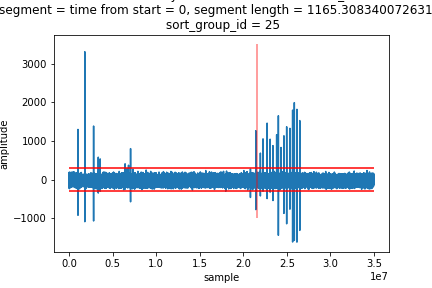

In [56]:
%matplotlib widget
ix = 1
plt.figure()
data_1_row = data[ix]
plt.plot(data_1_row)
plt.title(f'electrode {ix},\n{session_data}')
plt.ylabel('amplitude')
plt.xlabel('sample')
thresh= 300
plt.hlines(thresh,0,len(data_1_row),color='r')
plt.hlines((-1*thresh),0,len(data_1_row),color='r')

plt.vlines(12/(total_time_s/60)*len(data[ix]), -1000,3500,color='red',alpha=.5)# this was the time that i notes lick artifact

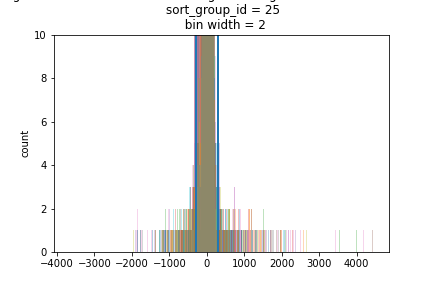

In [50]:
import math
plt.figure()
for ix in range(0,shape[0]):
    # plt.figure()
    # plt.hist(data[ix], alpha=.3)
    plt.ylim(0,10)
    plt.ylabel('count')
    plt.vlines(300,0,1000)
    plt.vlines(-1*300,0,1000)
    w = 2
    n = math.ceil((data[ix].max() - data[ix].min())/w) #number of bins
    ax = plt.hist(data[ix], bins = n, alpha =.3)
    plt.title(f'histogram of all amplitudes for all electrodes\n {session_data}\n  bin width = {w}')#{artifact_params}

In [44]:
# from scipy.stats import norm
# from statsmodels.stats import shapiro
# my_data = norm.rvs(size=500)
# shapiro(my_data)

In [45]:
# data[0]

In [46]:
# shapiro_test = stats.shapiro(data[0])

In [47]:
# shapiro_test

In [48]:
mean_amp = np.mean(data[0])
sd_amp = np.std(data[0])
print(mean_amp)
print(sd_amp)

-1.899418e-05
19.522652


Text(0.5, 1.0, 'histogram of all amplitudes for electrode 3 \n  rat = senor day = 20201030 session = 06_r3 \nsegment = time from start = 0, segment length = 1165.3083400726318 \n sort_group_id = 25\n  bin width = 5')

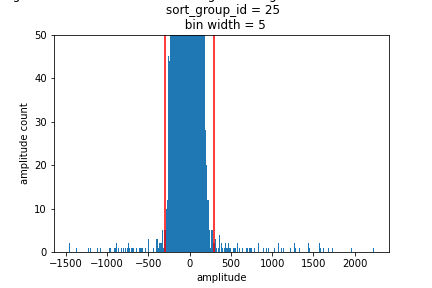

In [53]:
import math

plt.figure()
electrode = 3
# plt.hist(data[electrode])
plt.ylim(0,50)
plt.ylabel('amplitude count')
plt.xlabel('amplitude')
plt.vlines(300,0,1000000, color='red')
plt.vlines(-1*300,0,1000000, color='red')

# plt.vlines(param_dict.get('amplitude_thresh'),0,1000000, color='red')
# plt.vlines(-1*param_dict.get('amplitude_thresh'),0,1000000, color='red')
w = 5
n = math.ceil((data[electrode].max() - data[electrode].min())/w) #number of bins
ax = plt.hist(data[electrode], bins = n)
plt.title(f'histogram of all amplitudes for electrode {electrode} \n  {session_data}\n  bin width = {w}')#{artifact_params}\n


#non parametric ways to find outliers
# maybe the data is mostly normal.. (theres tests for that) 
#amp is raw- anything gigantic. z score is relative to center of data (could change on sessions, days etc) (diff electrodes) 
#thinking in z scores here! amplitude is a catch all. z score might differ. 

#write own functin for trnalsation of amplitude to z score 
#find the mean and sd 
#writing a z scoring function. 

In [ ]:
electrode = 0 
center = 100
for ix in range(len(above_both)):
    #plt the 100 points on either side of the artifact
    plt.figure()
    data_sample = data[electrode,(above_both[ix]-center):(above_both[ix]+center)]
    plt.plot(data_sample)
    plt.xlabel('samples around artifact time')
    plt.ylabel('amplitude')
    plt.title(f'amplitude 200 samples around each detected artifact time \n {session_data} \n {artifact_params} electrode{electrode}')
    art_start=center-half_window_points
    art_end=center+half_window_points
    plt.axvspan(art_start,art_end, color='red', alpha=0.5)